<a href="https://colab.research.google.com/github/xcellentbird/Deep_Learning/blob/main/MNIST_%EB%93%9C%EB%94%94%EC%96%B4_CNN%EA%B3%BC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

❗주의: 대부분의 알고리즘은 경험적으로 얻은 것이므로 깊게 이해하기보단, 많이 모델을 사용해가면서 감을 익히자.

In [11]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=45)

In [17]:
def model_cnn(new_layer = None):
  model = keras.Sequential()
  
  # CNN Layers
  ## ex) 32개의 size=(3,3)의 필터(커널) 파라미터 수는 ((3 * 3) + 1) * 32 = 320
  model.add(keras.layers.Conv2D(32, kernel_size=3, strides=(1, 1), activation= 'relu', padding='same', input_shape = (28,  28, 1))) # => 28 * 28 * 1 * 32
  model.add(keras.layers.MaxPool2D(2)) # => 14 * 14 * 1 * 32
  ## ex) 64개의 size=(3,3)의 필터(커널) 파라미터 수는 14 * 14 * 64 = 18496???
  model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')) # => 14 * 14 * 1 * 64
  model.add(keras.layers.MaxPool2D(2)) # => 7 * 7 * 1 * 64
  
  # DNN Layers
  model.add(keras.layers.Flatten()) # => 7 * 7 * 1 * 64 = 3136
  model.add(keras.layers.Dense(100, activation='relu')) # => 100
  model.add(keras.layers.Dropout(0.4)) # => 100
  model.add(keras.layers.Dense(10, activation='softmax')) # => 10
  
  return model

model = model_cnn()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

여기에서 pooling을 사용하는 이유는 convolution layer에서 stride를 크게 하여 feature map을 줄이는 것보다 pooling layer에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 때문이다.

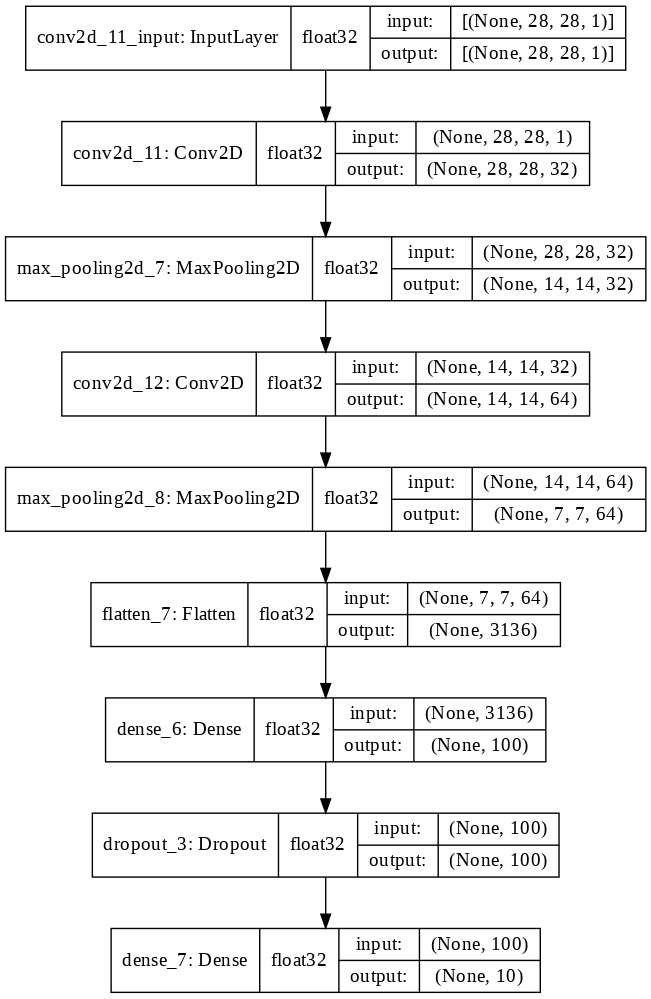

In [28]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=100, show_layer_names=True, show_dtype=True)

In [29]:
Adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=Adam, loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

score = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint, early_stopping])

Epoch 1/20
1500/1500 [==============================] - 68s 44ms/step - loss: 0.7026 - accuracy: 0.7439 - val_loss: 0.3352 - val_accuracy: 0.8778
Epoch 2/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.3521 - accuracy: 0.8755 - val_loss: 0.2787 - val_accuracy: 0.8992
Epoch 3/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2944 - accuracy: 0.8949 - val_loss: 0.2587 - val_accuracy: 0.9038
Epoch 4/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2613 - accuracy: 0.9060 - val_loss: 0.2570 - val_accuracy: 0.9039
Epoch 5/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2334 - accuracy: 0.9151 - val_loss: 0.2288 - val_accuracy: 0.9166
Epoch 6/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2173 - accuracy: 0.9187 - val_loss: 0.2191 - val_accuracy: 0.9198
Epoch 7/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1962 - accuracy: 0.9269 - val_loss: 0.2312 -

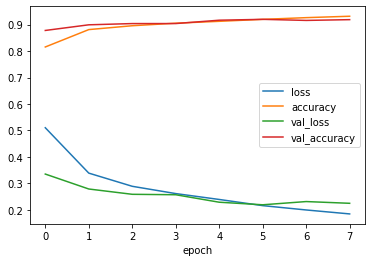

In [30]:
import matplotlib.pyplot as plt

legend = []
for key, value in zip(score.history.keys(), score.history.values()):
  plt.plot(value)
  legend.append(key)
plt.xlabel('epoch')
plt.legend(legend)
plt.show()

In [31]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 12ms/step - loss: 0.2191 - accuracy: 0.9198


[0.21906831860542297, 0.9198333621025085]

In [32]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 14ms/step - loss: 0.2433 - accuracy: 0.9129


[0.24327485263347626, 0.9128999710083008]

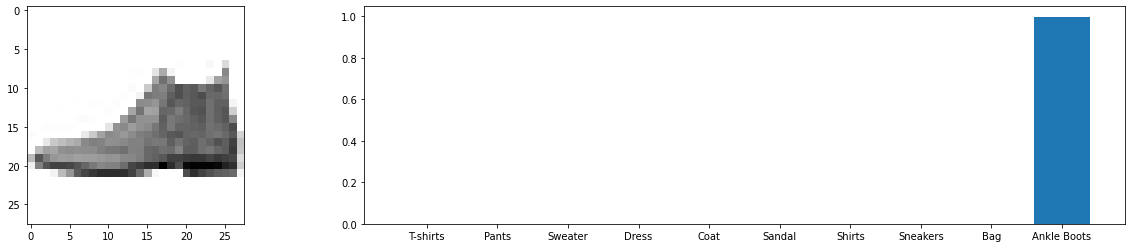

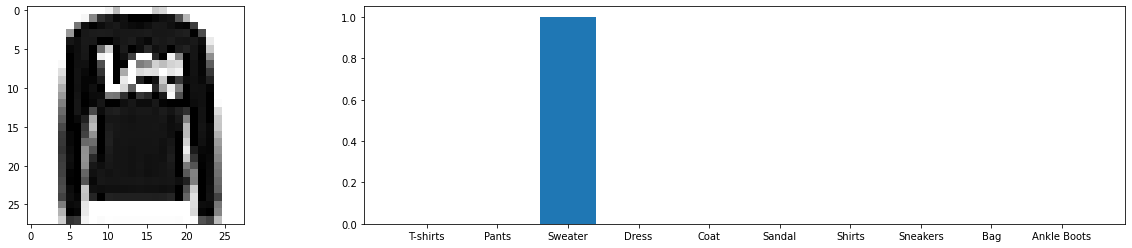

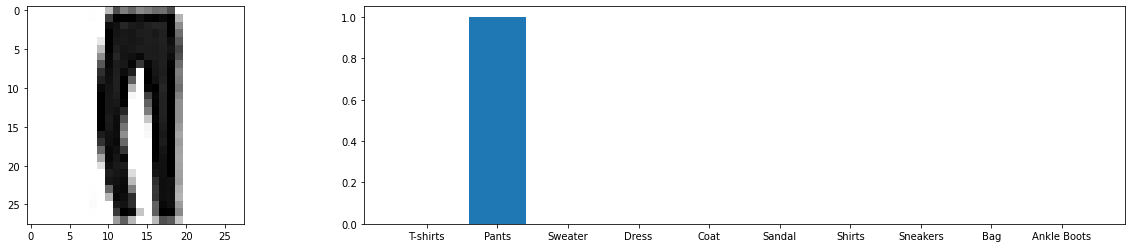

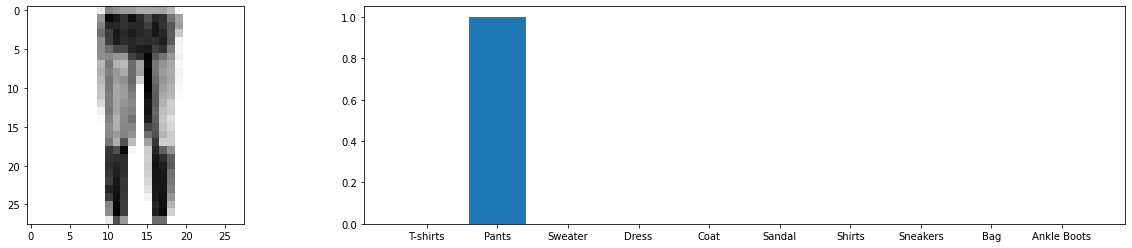

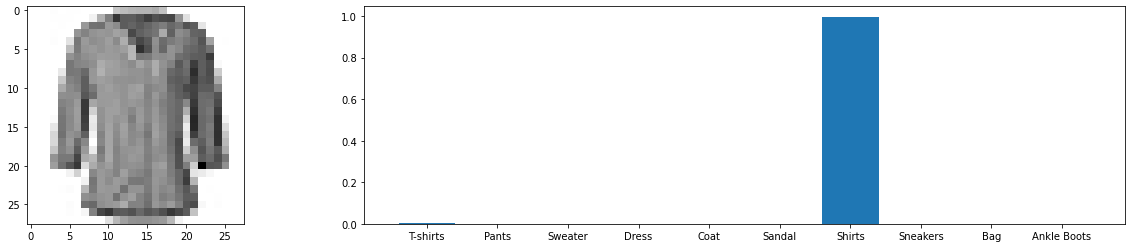

In [103]:
from matplotlib import gridspec

predict = model.predict(test_scaled[:5])
classes = ['T-shirts', 'Pants', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirts', 'Sneakers', 'Bag', 'Ankle Boots']

for i in range(5):
  fig = plt.figure(figsize=(20, 4))
  gs = gridspec.GridSpec(1, 2, width_ratios=[5, 15])
  ax0 = plt.subplot(gs[0])
  ax0.imshow(test_scaled[i].reshape(28, 28), cmap='gray_r')

  ax1 = plt.subplot(gs[1])
  ax1.bar(range(len(classes)), predict[i])
  plt.xticks(range(len(classes)), classes)
  plt.show()

In [105]:
# 첫번째 층을 불러온다.
conv = model.layers[0]
# 가중치와 절편의 모양을 출력
print(conv.weights[0].shape, conv.weights[1].shape)

conv_weights = conv.weights[0].numpy()
# 가중치의 평균과 표준편차
print(conv_weights.mean(), conv_weights.std())

(3, 3, 1, 32) (32,)
-0.011574712 0.21677904


(288, 1)


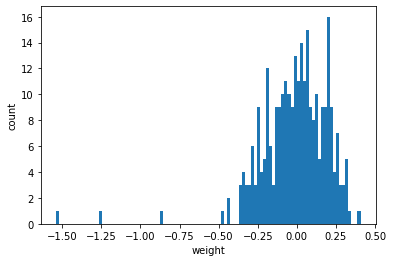

In [109]:
print(conv_weights.reshape(-1, 1).shape)
plt.hist(conv_weights.reshape(-1, 1), bins=100)
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

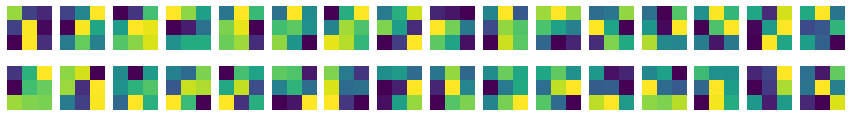

In [119]:
# 좋은 학습 모델일 수록 feature map을 시각화하였을 때, 픽셀 간 밝기 차이가 크다.
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j])
    axs[i,j].axis('off')
plt.show()

In [121]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_11_input'), name='conv2d_11_input', description="created by layer 'conv2d_11_input'")


In [122]:
# 함수형 API를 사용하여 첫번째 층의 모델 + 가중치를 가져온다.
conv_acti = keras.models.Model(model.input, model.layers[0].output)

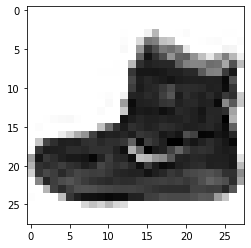

In [123]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [126]:
# 첫번째 층 모델만으로 fit하여 중간의 feature map을 가져온다
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)


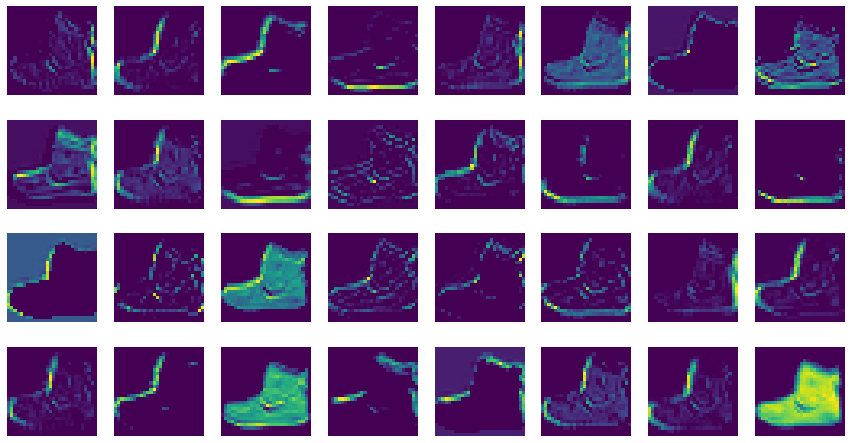

In [128]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [129]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1) / 255.0)
print(feature_maps.shape)

(1, 14, 14, 64)


Conv Layer를 많이 쌓을수록 feature map을 직관적으로 이해하기 힘들어진다. CNN의 앞부분에 있는 Conv Layer은 이미지의 시각적인 정보를 감지하고, 뒤쪽은 앞쪽에서 감지한 시각적 정보를 바탕으로 추상적인 정보를 학습한다고 할 수 있다.
=> 어떠한 이미지를 보내는가가 학습에 중요하게 작용할 것으로 보인다.

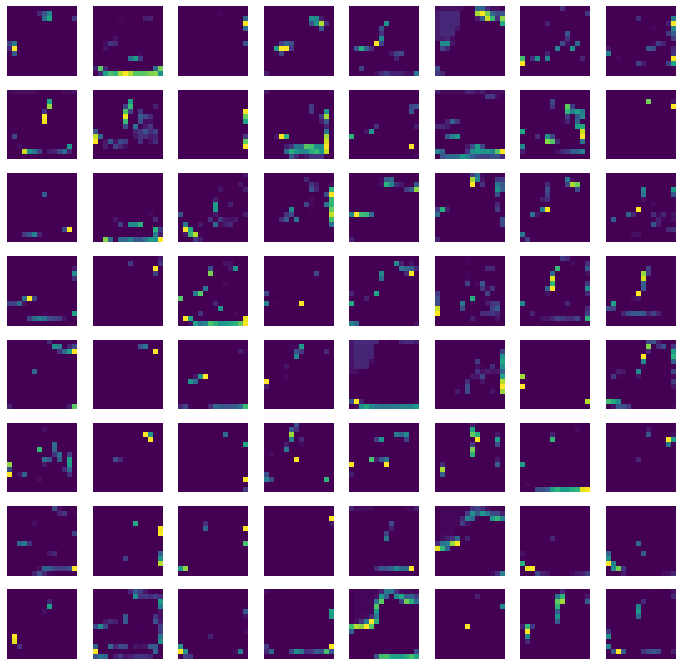

In [130]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()